In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
path = '/Users/jmaxi/Portafolio/Data usada/Sa/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    data = pd.concat([data, current_data])
    
data.to_csv("/Users/jmaxi/Portafolio/Data usada/Sa/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv", index=False)

In [2]:
data = pd.read_csv("/Users/jmaxi/Portafolio/Data usada/Sa/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv")

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
len(data)

186850

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


---
Borrando valores faltantes

In [4]:
#valores nulos
data.isnull().values.ravel().sum()

3270

In [5]:
data = data.dropna(axis = 0, how = 'all')

In [6]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [9]:
len(data)

186305

---

Eliminando valores que difieren de su tipo de dato (respecto al resto) en cada columna

In [7]:
t_f = data['Order Date'].str[0:2]!='Or'

In [8]:
t_f.tolist().count(False)
#estos son los valores que no tienen fecha

355

In [9]:
#cilo para identificar el indice del valor anormal
false_index = t_f.tolist()
c = 0
for i in range(len(false_index)):
    if false_index[i] == True:
        c = c + 1
    else:
        break
        
print(c)

517


In [13]:
#visualizamos el problema
data[516:518]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df = data[data['Order Date'].str[0:2]!='Or'] #seleccionamos solo aquellos que contengan los datos correctos en la col Order Date

In [11]:
len(df)

185950

---

Transformando los tipos de datos numericos a datos numericos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


---
Agregamos columna de mes

In [16]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Columna ciudad y estado

In [17]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)}')
df['State'] = df['Purchase Address'].apply(lambda x: f'{get_state(x)}')
df.head()

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA


In [18]:
df['Total profit'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total profit
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99


---
### What is the city with the most sales?

In [57]:
city_quantity = df[['Month', 'Quantity Ordered', 'Total profit']].astype('int')
city_quantity.groupby(['Month']).sum()

,Quantity Ordered,Total profit
Month,,
1,10903,1815143
2,13449,2193165
3,17005,2795907
4,20558,3377215
5,18667,3140375
6,15253,2567871
7,16072,2637209
8,13448,2235667
9,13109,2088915


range(1, 13)


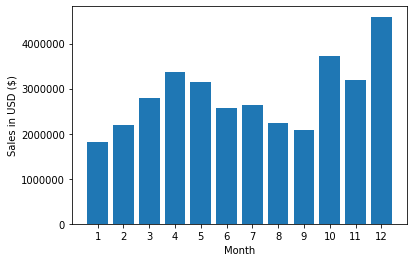

In [67]:
months = range(1,13)
print(months)

plt.bar(months,city_quantity.groupby(['Month']).sum()['Total profit'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

### Which city sells the most products?

In [70]:
city_prod = df[['City', 'Product', 'Quantity Ordered']]

In [125]:
city_prod.groupby(['City']).sum()

,Quantity Ordered
City,
Atlanta,16602
Austin,11153
Boston,22528
Dallas,16730
Los Angeles,33289
New York City,27932
Portland,14053
San Francisco,50239
Seattle,16553


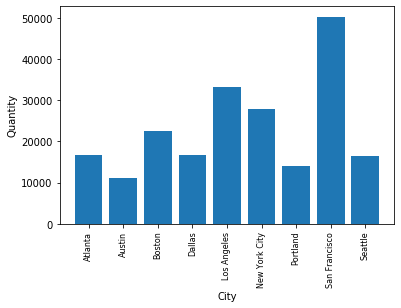

In [127]:
keys = [city for city, df in city_prod.groupby(['City'])]

plt.bar(keys,city_prod.groupby(['City']).sum()['Quantity Ordered'])
plt.ylabel('Quantity')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### What product is sold the most in each city? Which one leaves more profit?

In [69]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [76]:
city_prod.groupby(['City', 'Product']).sum()

Quantity Ordered
City    Product                                 
Atlanta 20in Monitor                         342
        27in 4K Gaming Monitor               493
        27in FHD Monitor                     588
        34in Ultrawide Monitor               482
        AA Batteries (4-pack)               2193
...                                          ...
Seattle ThinkPad Laptop                      333
        USB-C Charging Cable                1869
        Vareebadd Phone                      179
        Wired Headphones                    1652
        iPhone                               546

[171 rows x 1 columns]

In [80]:
df.City.value_counts()

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

San Francisco:

In [84]:
San_Francisco = df[df.City == 'San Francisco']

In [87]:
San_Francisco.groupby(['Product']).sum()

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
20in Monitor,1000,109220.07,7313,109990.00
27in 4K Gaming Monitor,1460,567825.44,10213,569385.40
27in FHD Monitor,1814,270431.97,12639,272081.86
34in Ultrawide Monitor,1446,547945.58,10078,549465.54
AA Batteries (4-pack),6555,18827.52,34524,25171.20
AAA Batteries (4-pack),7408,14746.68,35049,22149.92
Apple Airpods Headphones,3733,555750.00,25749,559950.00
Bose SoundSport Headphones,3317,328667.13,23386,331666.83
Flatscreen TV,1154,344700.00,8351,346200.00


In [95]:
#Producto mas vendido en San Francisco
sf_g = pd.DataFrame(San_Francisco.groupby(['Product']).sum())
sf_g.sort_values(by = ['Quantity Ordered'], ascending = False)

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),7408,14746.68,35049,22149.92
AA Batteries (4-pack),6555,18827.52,34524,25171.20
USB-C Charging Cable,5894,64147.60,37882,70433.30
Lightning Charging Cable,5557,77351.30,36536,83077.15
Wired Headphones,4966,55058.08,32652,59542.34
Apple Airpods Headphones,3733,555750.00,25749,559950.00
Bose SoundSport Headphones,3317,328667.13,23386,331666.83
27in FHD Monitor,1814,270431.97,12639,272081.86
iPhone,1661,1162000.00,11409,1162700.00


In [106]:
def productSoldInCity(df = df, city = 'San Francisco', counter_of = 'Product', sorted_by = 'Quantity Ordered'):
    city = df[df.City == city]
    c = pd.DataFrame(city.groupby([counter_of]).sum())
    return c.sort_values(by = [sorted_by], ascending = False)

In [108]:
#Producto con mayor ganancia bruta en San Francisco
productSoldInCity(sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,1136,1927800.00,7954,1931200.00
iPhone,1661,1162000.00,11409,1162700.00
ThinkPad Laptop,963,962990.37,6711,962990.37
Google Phone,1358,813000.00,9417,814800.00
27in 4K Gaming Monitor,1460,567825.44,10213,569385.40
Apple Airpods Headphones,3733,555750.00,25749,559950.00
34in Ultrawide Monitor,1446,547945.58,10078,549465.54
Flatscreen TV,1154,344700.00,8351,346200.00
Bose SoundSport Headphones,3317,328667.13,23386,331666.83


Los Angeles:

In [107]:
#producto mas vendido
productSoldInCity(city = 'Los Angeles')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),4967,9905.87,23028,14851.33
AA Batteries (4-pack),4438,12629.76,23294,17041.92
USB-C Charging Cable,3782,41275.30,23997,45194.90
Lightning Charging Cable,3772,52504.40,24827,56391.40
Wired Headphones,3270,36485.57,21501,39207.30
Apple Airpods Headphones,2473,367800.00,17531,370950.00
Bose SoundSport Headphones,2125,209879.01,14985,212478.75
27in FHD Monitor,1223,182537.83,8464,183437.77
iPhone,1118,781900.00,7899,782600.00


In [109]:
#producto con mayor ganancia bruta
productSoldInCity(city = 'Los Angeles', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,751,1276700.00,5223,1276700.00
iPhone,1118,781900.00,7899,782600.00
ThinkPad Laptop,641,640993.59,4474,640993.59
Google Phone,848,507000.00,5783,508800.00
27in 4K Gaming Monitor,1003,391159.97,7176,391159.97
Apple Airpods Headphones,2473,367800.00,17531,370950.00
34in Ultrawide Monitor,955,362130.47,6699,362890.45
Flatscreen TV,727,217200.00,5129,218100.00
Bose SoundSport Headphones,2125,209879.01,14985,212478.75


New York City:

In [110]:
productSoldInCity(city = 'New York City')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),4124,8291.27,19638,12330.76
AA Batteries (4-pack),3630,10272.00,19149,13939.20
USB-C Charging Cable,3269,35587.10,20941,39064.55
Lightning Charging Cable,3041,42771.95,20104,45462.95
Wired Headphones,2707,29855.10,17713,32456.93
Apple Airpods Headphones,2098,311850.00,14847,314700.00
Bose SoundSport Headphones,1794,177082.29,12440,179382.06
27in FHD Monitor,1072,160339.31,7441,160789.28
iPhone,881,616700.00,6370,616700.00


In [111]:
productSoldInCity(city = 'New York City', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,657,1115200.00,4614,1116900.00
iPhone,881,616700.00,6370,616700.00
ThinkPad Laptop,560,558994.41,3974,559994.40
Google Phone,758,454800.00,5193,454800.00
34in Ultrawide Monitor,868,328691.35,6186,329831.32
27in 4K Gaming Monitor,842,327591.60,5909,328371.58
Apple Airpods Headphones,2098,311850.00,14847,314700.00
Flatscreen TV,628,187500.00,4437,188400.00
Bose SoundSport Headphones,1794,177082.29,12440,179382.06


Boston:

In [113]:
productSoldInCity(city = 'Boston')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),3461,6879.99,16305,10348.39
AA Batteries (4-pack),3016,8505.60,15761,11581.44
USB-C Charging Cable,2561,27879.35,16758,30603.95
Lightning Charging Cable,2491,34728.85,16645,37240.45
Wired Headphones,2222,24279.75,14184,26641.78
Apple Airpods Headphones,1653,246300.00,11405,247950.00
Bose SoundSport Headphones,1416,140185.98,9732,141585.84
27in FHD Monitor,797,118942.07,5569,119542.03
iPhone,753,526400.00,5333,527100.00


In [114]:
productSoldInCity(city = 'Boston', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,479,812600.00,3501,814300.00
iPhone,753,526400.00,5333,527100.00
ThinkPad Laptop,447,445995.54,3123,446995.53
Google Phone,593,355200.00,4060,355800.00
27in 4K Gaming Monitor,675,262463.27,4920,263243.25
34in Ultrawide Monitor,671,254213.31,4717,254973.29
Apple Airpods Headphones,1653,246300.00,11405,247950.00
Flatscreen TV,554,165300.00,3865,166200.00
Bose SoundSport Headphones,1416,140185.98,9732,141585.84


Atlanta:

In [115]:
productSoldInCity(city = 'Atlanta')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),2359,4778.02,11310,7053.41
AA Batteries (4-pack),2193,6378.24,11702,8421.12
USB-C Charging Cable,1915,21187.35,12873,22884.25
Lightning Charging Cable,1879,26222.30,12206,28091.05
Wired Headphones,1579,17325.55,10140,18932.21
Apple Airpods Headphones,1266,189450.00,8794,189900.00
Bose SoundSport Headphones,1084,107689.23,7503,108389.16
27in FHD Monitor,588,87594.16,4112,88194.12
iPhone,544,379400.00,3587,380800.00


In [116]:
productSoldInCity(city = 'Atlanta', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,379,644300.00,2779,644300.00
iPhone,544,379400.00,3587,380800.00
ThinkPad Laptop,357,356996.43,2450,356996.43
Google Phone,451,270600.00,3107,270600.00
27in 4K Gaming Monitor,493,191875.08,3720,192265.07
Apple Airpods Headphones,1266,189450.00,8794,189900.00
34in Ultrawide Monitor,482,181635.22,3381,183155.18
Flatscreen TV,407,121500.00,2743,122100.00
Bose SoundSport Headphones,1084,107689.23,7503,108389.16


Dallas:

In [117]:
productSoldInCity(city = 'Dallas')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),2504,4933.50,11932,7486.96
AA Batteries (4-pack),2261,6501.12,11805,8682.24
Lightning Charging Cable,1864,25714.00,12004,27866.80
USB-C Charging Cable,1852,20207.45,11917,22131.40
Wired Headphones,1669,18164.85,10818,20011.31
Apple Airpods Headphones,1194,178050.00,8443,179100.00
Bose SoundSport Headphones,1063,105489.45,7304,106289.37
27in FHD Monitor,587,86994.20,4028,88044.13
iPhone,519,363300.00,3670,363300.00


In [118]:
productSoldInCity(city = 'Dallas', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,382,649400.00,2734,649400.00
iPhone,519,363300.00,3670,363300.00
ThinkPad Laptop,345,344996.55,2464,344996.55
Google Phone,461,276600.00,3131,276600.00
34in Ultrawide Monitor,512,194174.89,3520,194554.88
27in 4K Gaming Monitor,481,186805.21,3497,187585.19
Apple Airpods Headphones,1194,178050.00,8443,179100.00
Flatscreen TV,420,125700.00,3020,126000.00
Bose SoundSport Headphones,1063,105489.45,7304,106289.37


Seattle:

In [119]:
productSoldInCity(city = 'Seattle')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),2446,4855.76,11718,7313.54
AA Batteries (4-pack),2179,6270.72,11597,8367.36
USB-C Charging Cable,1869,20362.80,12203,22334.55
Lightning Charging Cable,1775,24697.40,11919,26536.25
Wired Headphones,1652,18092.91,10596,19807.48
Apple Airpods Headphones,1258,187500.00,8887,188700.00
Bose SoundSport Headphones,1062,105689.43,7569,106189.38
27in FHD Monitor,579,86544.23,4045,86844.21
iPhone,546,381500.00,3934,382200.00


In [120]:
productSoldInCity(city = 'Seattle', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,356,605200.00,2602,605200.00
iPhone,546,381500.00,3934,382200.00
ThinkPad Laptop,333,332996.67,2325,332996.67
Google Phone,434,260400.00,3183,260400.00
27in 4K Gaming Monitor,538,209034.64,3701,209814.62
34in Ultrawide Monitor,534,202534.67,3591,202914.66
Apple Airpods Headphones,1258,187500.00,8887,188700.00
Flatscreen TV,375,112200.00,2704,112500.00
Bose SoundSport Headphones,1062,105689.43,7569,106189.38


Portland:

In [121]:
productSoldInCity(city = 'Portland')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),2080,4063.41,9684,6219.20
AA Batteries (4-pack),1939,5518.08,10131,7445.76
USB-C Charging Cable,1582,17423.10,10281,18904.90
Lightning Charging Cable,1531,21453.25,10314,22888.45
Wired Headphones,1362,14867.60,8677,16330.38
Apple Airpods Headphones,1099,163350.00,7606,164850.00
Bose SoundSport Headphones,889,88291.17,6229,88891.11
27in FHD Monitor,530,79194.72,3779,79494.70
iPhone,450,314300.00,3114,315000.00


In [122]:
productSoldInCity(city = 'Portland', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,337,572900.00,2387,572900.00
iPhone,450,314300.00,3114,315000.00
ThinkPad Laptop,274,273997.26,1918,273997.26
Google Phone,355,213000.00,2496,213000.00
27in 4K Gaming Monitor,434,168865.67,3009,169255.66
Apple Airpods Headphones,1099,163350.00,7606,164850.00
34in Ultrawide Monitor,403,152755.98,2772,153135.97
Flatscreen TV,312,93300.00,2195,93600.00
Bose SoundSport Headphones,889,88291.17,6229,88891.11


Austin:

In [123]:
productSoldInCity(city = 'Austin')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
AAA Batteries (4-pack),1668,3262.09,7706,4987.32
AA Batteries (4-pack),1424,4112.64,7595,5468.16
Lightning Charging Cable,1307,18343.65,8537,19539.65
USB-C Charging Cable,1251,13670.80,7967,14949.45
Wired Headphones,1130,12265.77,7116,13548.70
Apple Airpods Headphones,887,132300.00,6215,133050.00
Bose SoundSport Headphones,707,69393.06,4965,70692.93
iPhone,377,263900.00,2625,263900.00
27in FHD Monitor,360,53396.44,2481,53996.40


In [124]:
productSoldInCity(city = 'Austin', sorted_by = 'Total profit')

,Quantity Ordered,Price Each,Month,Total profit
Product,,,,
Macbook Pro Laptop,251,426700.00,1754,426700.00
iPhone,377,263900.00,2625,263900.00
ThinkPad Laptop,210,209997.90,1511,209997.90
Google Phone,274,164400.00,1935,164400.00
Apple Airpods Headphones,887,132300.00,6215,133050.00
34in Ultrawide Monitor,328,124636.72,2360,124636.72
27in 4K Gaming Monitor,318,124016.82,2295,124016.82
Flatscreen TV,242,72600.00,1780,72600.00
Bose SoundSport Headphones,707,69393.06,4965,70692.93


---

### What time do they buy more?

In [32]:
#Creamos columnas de hora y minutos
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total profit,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27


In [33]:
df.to_csv("/Users/jmaxi/Portafolio/Data usada/Sa/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/data_clean_and_aggregate.csv", index=False)

In [2]:
df = pd.read_csv("/Users/jmaxi/Portafolio/Data usada/Sa/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/data_clean_and_aggregate.csv")

In [131]:
hour_data = df[['Order ID','Hour', 'Minute']]
hour_data['Count'] = 1

C:\Users\jmaxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


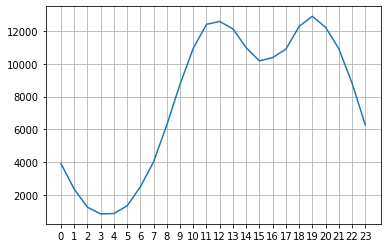

In [133]:
keys = [pair for pair, df in hour_data.groupby(['Hour'])]

plt.plot(keys, hour_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

#### What time are the most popular products bought?

In [40]:
AAA = df[df['Product'] == 'AAA Batteries (4-pack)']
AA = df[df['Product'] == 'AA Batteries (4-pack)']
light = df[df['Product'] == 'Lightning Charging Cable']
wired = df[df['Product'] == 'Wired Headphones']
usb = df[df['Product'] == 'USB-C Charging Cable']
popular_prod = pd.concat([AAA,AA,light,wired,usb], axis = 0)
popular_prod['count'] = 1

In [36]:
popular_prod.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total profit,Hour,Minute
20,176575,AAA Batteries (4-pack),1,2.99,04/27/19 00:30,"433 Hill St, New York City, NY 10001",4,New York City,NY,2.99,0,30
28,176583,AAA Batteries (4-pack),2,2.99,04/20/19 12:00,"146 Jackson St, Portland, OR 97035",4,Portland,OR,5.98,12,0
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,San Francisco,CA,5.98,17,0
45,176598,AAA Batteries (4-pack),2,2.99,04/21/19 20:33,"294 Park St, San Francisco, CA 94016",4,San Francisco,CA,5.98,20,33
54,176607,AAA Batteries (4-pack),2,2.99,04/18/19 12:11,"689 10th St, Boston, MA 02215",4,Boston,MA,5.98,12,11


In [37]:
popular_prod.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total profit,Hour,Minute
186830,259339,USB-C Charging Cable,2,11.95,09/12/19 23:43,"509 Park St, Austin, TX 73301",9,Austin,TX,23.90,23,43
186834,259343,USB-C Charging Cable,1,11.95,09/14/19 19:30,"675 Maple St, Austin, TX 73301",9,Austin,TX,11.95,19,30
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,San Francisco,CA,11.95,13,49
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,San Francisco,CA,11.95,15,49
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,San Francisco,CA,11.95,0,18


In [31]:
len(popular_prod)

103661

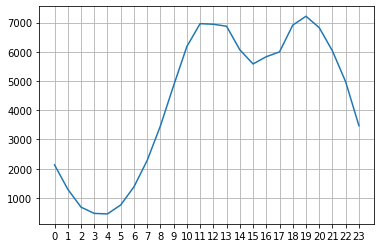

In [41]:
keys = [pair for pair, df in popular_prod.groupby(['Hour'])]

plt.plot(keys, popular_prod.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

---
### What products are usually sold together?

In [4]:
dup = df[df['Order ID'].duplicated(keep=False)]

In [5]:
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total profit,Hour,Minute
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,19,42
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA,11.95,19,42
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston,MA,99.99,11,31


In [11]:
dup['Sold togheter'] = dup.groupby(['Order ID'])['Product'].transform(lambda x: ', '.join(x))

KeyError: 'Column not found: Product'

In [12]:
dup = dup[['Order ID', 'Sold togheter']].drop_duplicates()

In [14]:
dup['Sold togheter'].value_counts()

iPhone,Lightning Charging Cable                                     882
Google Phone,USB-C Charging Cable                                   856
iPhone,Wired Headphones                                             361
Vareebadd Phone,USB-C Charging Cable                                312
Google Phone,Wired Headphones                                       303
                                                                   ... 
34in Ultrawide Monitor,LG Washing Machine                             1
20in Monitor,Flatscreen TV                                            1
27in FHD Monitor,Vareebadd Phone                                      1
Google Phone,Bose SoundSport Headphones,Apple Airpods Headphones      1
Google Phone,Bose SoundSport Headphones,27in FHD Monitor              1
Name: Sold togheter, Length: 366, dtype: int64

In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Sold togheter']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]